Name : Ucik Refani Kurnia Sari

Class : R016

URL DASHBOARD
https://datastudio.google.com/reporting/38a127a4-ee42-4e12-8d62-093323f80829

Problem Topics: 
What marketing strategy can be applied, if supermarket sales experience a decline in sales in certain situations?

Background:
This method focuses on the actual sales numbers for the products sold. This helps determine which products are top performers and which are underperforming for better sales planning.

Problem Statement:
find out the sales performance of supermarkets which have 3 branches in different cities within 3 months.

Problem Description:
1. What kind of payment do customers prefer?
2. What is the most sold product category?
3. Which branch has the highest average revenue?
4. Based on the type of customer, which one generates more revenue?
5. which branch has the highest rating?
6. How to calculate central tendency, measure of variance (range, variance, standard deviation), and distribution data for total supermarket sales?
7. What is the average sales of sports and travel products significantly different from homes and lifestyles?


In [17]:
#import libarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
#Loading Data
data=pd.read_csv('supermarket_sales - Sheet1.csv')

In [4]:
#display the top 5 rows
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
#display the bottom 5 rows
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
#Display the data type of each column
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [7]:
# See the number of rows and columns
data.shape

(1000, 17)

Data Cleaning and Preprocessing

In [8]:
#see if there is an missing value
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

No missing value found

In [105]:
#Delete column
data.drop(columns='gross income', inplace=True)

In [106]:
#show data after delete rows
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total Sales,Date,Time,Payment,cogs,gross margin percentage,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,5.3


The gross income column has been deleted, only 16 columns remain. The gross income column is deleted because it is the same as the 5% tax column. meaning that 5% tax is considered gross income. 

In [107]:
#Rename Column Total to Total Sales
data.rename(columns={'Total': 'Total Sales'}, inplace= True)

Analysis

What kind of payment do customers prefer?

<AxesSubplot: ylabel='Invoice ID'>

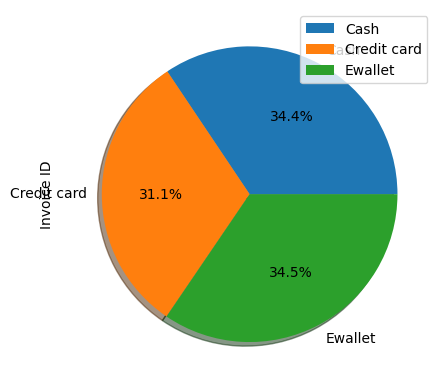

In [128]:
#Plotting the pie chart
data.groupby(['Payment']).count().plot(kind='pie', y= 'Invoice ID', autopct='%1.1f%%', shadow=True)

Customers prefer to pay with Ewallet compared to credit cards or cash. Because, it's simpler, just scan from our cellphone. However, many also make payments by cash. only 1 point difference.

What is the most sold product category?

<AxesSubplot: xlabel='Product line', ylabel='Quantity'>

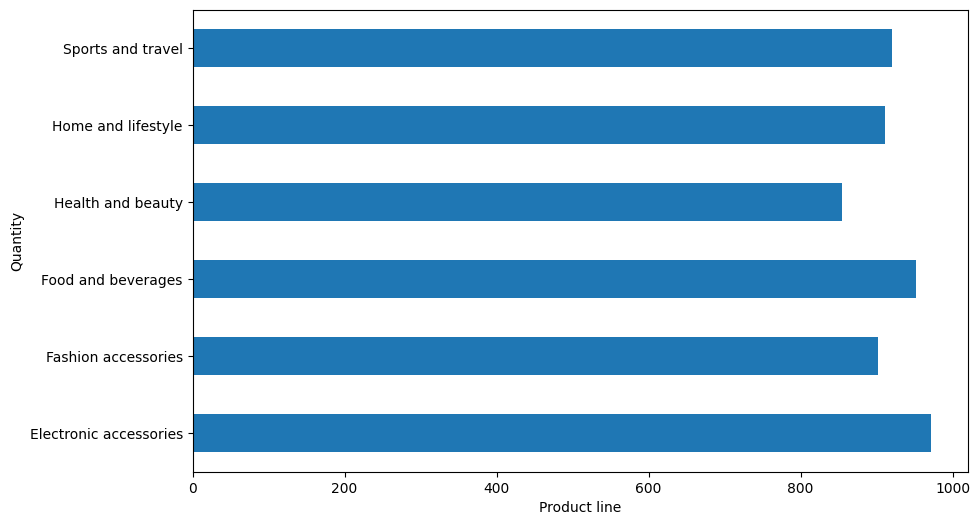

In [129]:
#Grouping product line with quantity 
df_group= data.groupby(['Product line'])['Quantity'].sum()
#Plotting the bar horizontal 
df_group.plot(kind='barh', xlabel='Product line', ylabel='Quantity', figsize=(10,6))

The most sold product category in supermarkets is electronic accessories with a total sales of 971 items. 

Which branch has the highest average revenue?

/var/folders/37/zw9ym1bn7f31rcp5g2cvjr8m0000gn/T/ipykernel_854/1732555182.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Branch']).mean().plot(kind='pie', y= 'Total Sales', autopct='%1.1f%%', shadow=True)


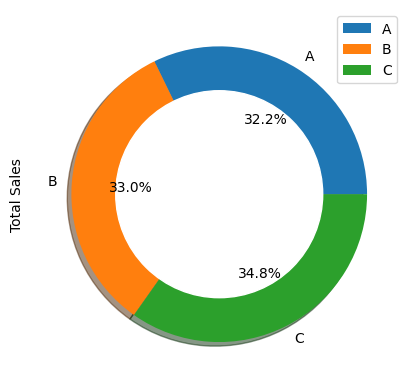

In [130]:
#Create pie chart
data.groupby(['Branch']).mean().plot(kind='pie', y= 'Total Sales', autopct='%1.1f%%', shadow=True)
#Plotting the donut chart
my_circle = plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


The branch that gets the highest average supermarket income is branch C, which is in the city of Naypyitaw.

Based on the type of customer, which one generates more revenue?


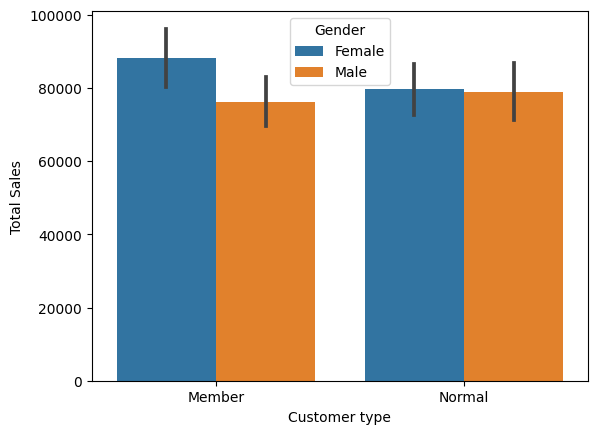

In [131]:
#create bar plot Total sales by customer type and gender
plt_4= sns.barplot(data=data, x='Customer type', y='Total Sales', hue='Gender', estimator=sum)

Based on the type of customer, which generates a lot of income is customer members. Then after being categorized again by gender, female customer members generate more income than male customer members. This is because female prefer shopping than male.

How is the trend of total sales in supermarket?

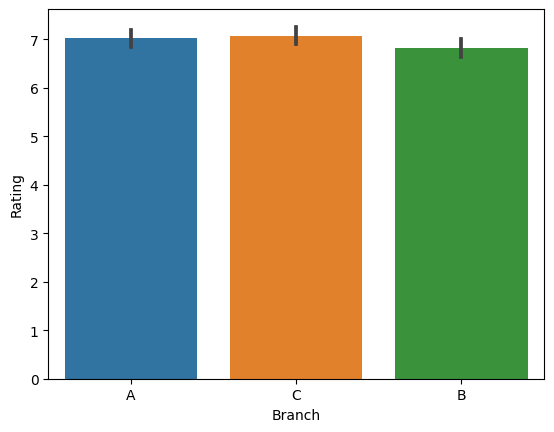

In [141]:
#create bar plot
plt_5= sns.barplot(data=data, x='Branch', y='Rating')

Branch c has the highest rating which means that the level of customer satisfaction of supermarkets in branch C in Naypyitaw city can be said to be good. When customers are comfortable, they will shop more and/or they will come back again.


Central Tendency

In [119]:
#get the mean
print ('Mean: ' +str(data['Total Sales'].mean()))
#get the median
print ('Median: ' +str(data['Total Sales'].median()))
#get the mode
print ('Mode: ' +str(data['Total Sales'].mode()[0]))
# get the standar deviasi
print('Standar Deviasi: ' +str(data['Total Sales'].std()))
#get the variance
print('Variance: ' +str(data['Total Sales'].var()))
#get the range
print('Range: ' +str(data['Total Sales'].max()-data['Total Sales'].min()))


Mean: 322.96674899999994
Median: 253.848
Mode: 87.234
Standar Deviasi: 245.88533510097187
Variance: 60459.598017717224
Range: 1031.9715


The standard deviation value is lower than the mean value, which means the data is relatively the same.
The difference between the lowest and highest values of Total Sales ​​is 1031.9715.



Check Skewness and Kurtosis

Total Sales Skewness: 0.8925698049581424
Total Sales kurtosis: -0.0818847579043509


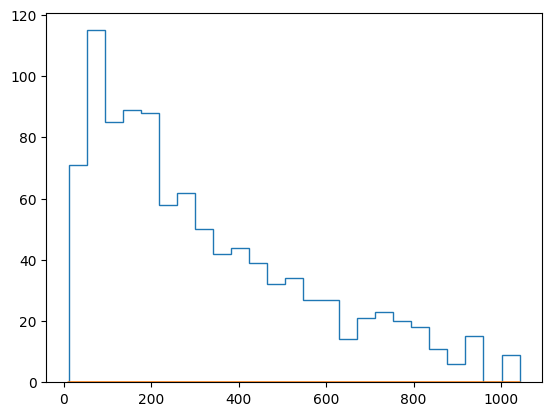

In [137]:
# Cek Skewness and Kurtosis
numcols = ['Total Sales']
for col in numcols:
    print (data[col].name, 'Skewness:', str(data[col].skew()))
    print(data[col].name + ' kurtosis: ' + str(data[col].kurt()))
    density = stats. gaussian_kde(data[col])
    n, x, _ = plt.hist(data[col], histtype='step', bins=25)
    plt.plot(x, density(x)*6)
    plt.show()
    print('\n')

The skewness value is above 0.05 then the data is not normal. Because this is sales data, and everyone spends money on shopping differently. hence, the distribution of the resulting data is not normal.

Check Distribution Data

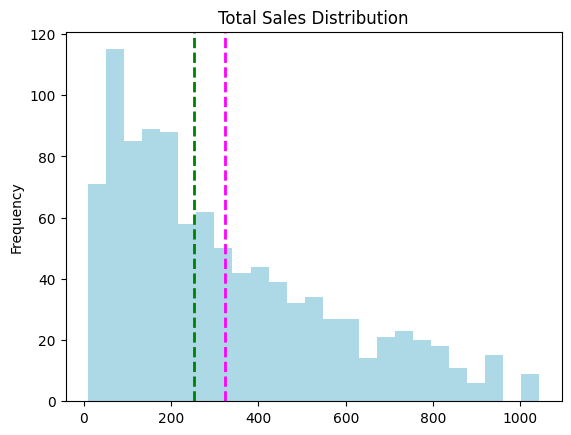

In [120]:
Total = data['Total Sales']
Total.plot.hist(title='Total Sales Distribution', color='lightblue', bins=25)  
plt.axvline(Total.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(Total.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Check Outlier

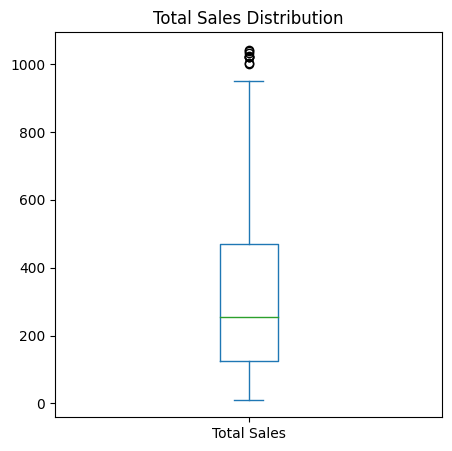

In [132]:
#Detect outlier
data['Total Sales'].plot(kind='box', title= 'Total Sales Distribution', figsize=(5,5))
plt.show()

From the plot it can be seen that there are outliers, this is reasonable because this is sales data and everyone spends money on shopping differently.

In [133]:
#Find the upper and lower quantile values
Q1 = data['Total Sales'].quantile(0.25)
Q3 = data['Total Sales'].quantile(0.75)
Q1, Q3

(124.422375, 471.35025)

In [134]:
#interquartile range
IQR = Q3-Q1
IQR

346.92787500000003

In [135]:
#create a lower limit and an upper limit
lower_limit= Q1 - 1.5*IQR
upper_limit = Q3+ 1.5*IQR
lower_limit, upper_limit

(-395.9694375, 991.7420625)

In [136]:
#detect outlier data
data[(data['Total Sales']>upper_limit) | (data['Total Sales']<lower_limit)]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total Sales,Date,Time,Payment,cogs,gross margin percentage,Rating
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,1/16/2019,13:32,Cash,955.8,4.761905,4.8
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2/8/2019,16:20,Credit card,989.8,4.761905,8.7
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2/15/2019,14:53,Credit card,993.0,4.761905,6.6
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,1/9/2019,13:45,Cash,954.4,4.761905,5.2
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2/8/2019,13:00,Credit card,972.1,4.761905,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,1/30/2019,20:23,Ewallet,985.2,4.761905,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,1/12/2019,16:18,Ewallet,975.0,4.761905,8.0
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,1/15/2019,13:48,Credit card,973.7,4.761905,4.9
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,17:16,Ewallet,973.8,4.761905,4.4


We found 9 outliers from the supermarket dataset, of which 9 were spending more than the average, more than 1000 dollars. while the other data the majority spend less than 1000 dollars. There are outliers because everyone has different shopping needs. Thus, it produces different data.


From the sales dataset, we will test whether the average sales of sports and travel products is significantly different or not with home and lifestyle. Hypothesis testing is done using Two Samples Independent Two Tailed Test

In [85]:
#Dataframe area 'Sports and travel'
data_STP = data[data['Product line']== 'Sports and travel']
#Dataframe area 'Home and Lifestyle'
data_HaL = data[data['Product line']== 'Home and lifestyle']
#displaying the average sales of sports and travel categories
print ('Average sales of Sports and Travel products: ${}'.format(np.round(data_STP['Total Sales'].mean())))
#displaying the average sales of Home and lifestyle categories
print ('Average sales of print Home and Lifestyle products: ${}'.format(np.round(data_HaL['Total Sales'].mean())))



Average sales of Sports and Travel products: $332.0
Average sales of print Home and Lifestyle products: $337.0


After calculating the average sales in 2 product categories, then make a hypothesis to be tested.

H0 is the average sales of the sports and travel product category not significantly different from the average sales of the Home and Lifestyle product category.
H0 = μ_STP = μ_HaL
H1 is the average sales of the sports and travel product category, which is significantly different from the average sales of the Home and Lifestyle product category.
H1 = μ_STP != μ_HaL

Confidence Interval used is 95%, then alpha 0.05.

Test the hypothesis using an independent t-test because the sample is a sample that is not related to each other.

In [86]:
# calculate t_stat and p_val
t_stat, p_val = stats.ttest_ind(data_STP['Total Sales'],data_HaL['Total Sales'])
print('P-value:',p_val) 
print('t-statistics:',t_stat)

P-value: 0.8697467613240438
t-statistics: -0.1641101472431057


/var/folders/37/zw9ym1bn7f31rcp5g2cvjr8m0000gn/T/ipykernel_854/2744346156.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Sportandtravel_pop , label='Average sales of Sports and Travel',color='blue')
/var/folders/37/zw9ym1bn7f31rcp5g2cvjr8m0000gn/T/ipykernel_854/2744346156.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

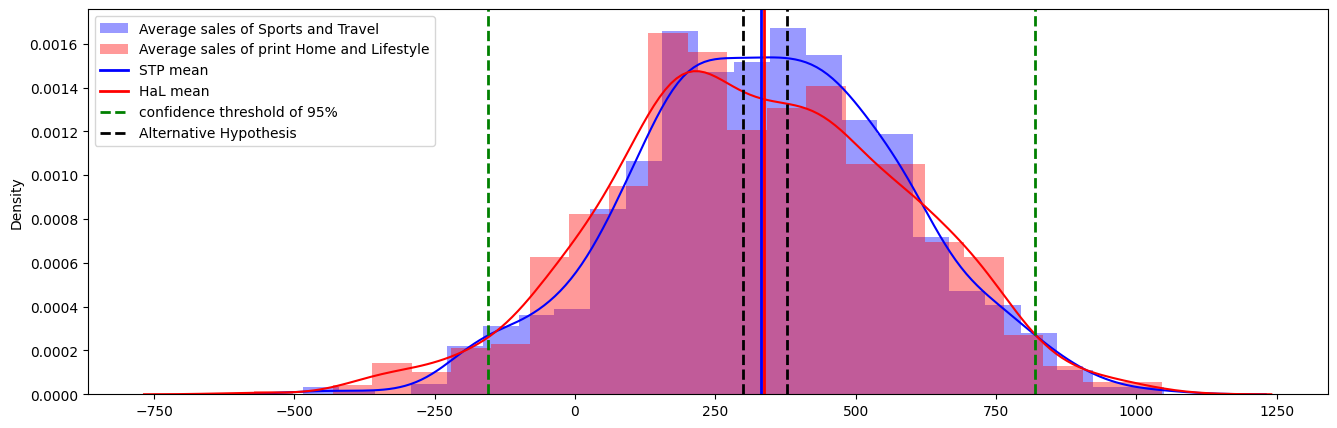

In [88]:
Sportandtravel_pop = np.random.normal(data_STP['Total Sales'].mean(),data_STP['Total Sales'].std(),1000)
HomeandLifestyle_pop = np.random.normal(data_HaL['Total Sales'].mean(),data_HaL['Total Sales'].std(),1000)

ci = stats.norm.interval(0.95, data_STP['Total Sales'].mean(), data_STP['Total Sales'].std())
plt.figure(figsize=(16,5))
sns.distplot(Sportandtravel_pop , label='Average sales of Sports and Travel',color='blue')
sns.distplot(HomeandLifestyle_pop, label='Average sales of print Home and Lifestyle',color='red')

plt.axvline(data_STP['Total Sales'].mean(), color='blue', linewidth=2, label='STP mean')
plt.axvline(data_HaL['Total Sales'].mean(), color='red',  linewidth=2, label='HaL mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(Sportandtravel_pop.mean() +t_stat*Sportandtravel_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(Sportandtravel_pop.mean() -t_stat*Sportandtravel_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

The results of the hypothesis testing above show that the alternative hypothesis line (H1) is within the critical value line. Based on these results, it is concluded that we fail to reject the null hypothesis that average sales of Sport and Travel products are not significantly different from the average sales of Home and Lifestyle products.

Overall Analysis: 
Based on the supermarket sales analysis that has been done:
1. Customers prefer to pay using e-wallet rather than cash or credit cards. 
2. Electronic accessories are the most sold product category in supermarkets in January-March 2019.
3. Branch c in Naypyitaw city is the supermarket branch with the highest sales in january-march 2019
4. Furthermore, the customers themselves are member customers and general/normal customers, in fact the customers who spend the most money for shopping are member customers with female gender, because female prefer shopping than male.
5. Branch c in  Naypyitaw city is the supermarket branch with the highest rating. Therefore, it is only natural that branch c gets the highest income than other branches.
6. The standard deviation value is lower than the mean value, which means the data is relatively the same. The data is not normally distributed because the skew value is above 0.05, and it is proven that there are 9 rows outliers.
7. the average sales of the Sport and Travels category products are not significantly different from the sales of the Home and lifestyle category products (tested by the independent two sample testing hypothesis).


Red thread:
Supermarkets already have their own market, it can be seen from the rating they get is high enough. This shows that customers are satisfied with the service of the supermarket team.
Under certain conditions, supermarkets dont have to worry about a decline in Total sales, because when viewed from the analysis above, the Total sales earned per day is quite constant.


Recommendation:
To retain customers, supermarkets can improve/at least maintain service to customers. Thus, customers do not change places to shop.
The product category that must be added or more complete is Electronic accesories. so it can attract more market.
In addition, to attract new customers, supermarkets can hold member promos, so that customers who have never purchased or customers who have not registered will register to get the promo. This, is a way to get customer data, so that it can provide information on weekly promos.

